In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.style as style
import matplotlib.pyplot as plt
from collections import Counter
from itertools import cycle
from tqdm import tqdm

In [2]:
sns.set_context('paper')
matplotlib.rcParams['font.family'] = 'sans-serif'
style.use('ggplot')
plt.style.use('seaborn')

In [2]:
dataset_path = '/home/szamani/PycharmProjects/anomaly_detection/dataset/concepts'
power_dir = 'powers'
light_dir = 'sensor/light'

power_supply = 'power_supply.csv'
light_sensor = ['{}.csv'.format(i) for i in range(1, 59)]

In [3]:
power_df = pd.read_csv(os.path.join(dataset_path, power_dir, power_supply))
power_df

,hour,supply
0,0,117.4
1,1,139.1
2,2,128.0
3,3,127.0
4,4,122.8
...,...,...
29923,29923,152.0
29924,29924,148.0
29925,29925,151.0
29926,29926,168.0


In [5]:
power_df['day'] = power_df['hour'].apply(lambda x: int(x/24) + 1)
power_df

,hour,supply,day
0,0,117.4,1
1,1,139.1,1
2,2,128.0,1
3,3,127.0,1
4,4,122.8,1
...,...,...,...
29923,29923,152.0,1247
29924,29924,148.0,1247
29925,29925,151.0,1247
29926,29926,168.0,1247


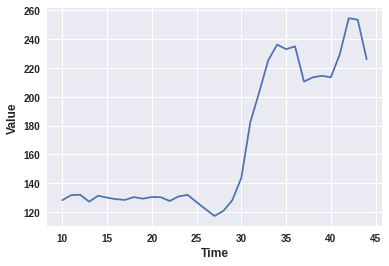

<Figure size 576x396 with 0 Axes>

In [7]:
plt.figure(figsize=(6,4))
lp = sns.lineplot(
            data=power_df.iloc[10:45,],
            x='hour', y='supply',
            palette=sns.color_palette(['lightcoral', 'lightskyblue', 'lightgreen', 'c']),
        )

plt.xlabel('Time', fontsize=12, weight='bold')
plt.ylabel('Value', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')

fig1 = plt.gcf()
plt.show()
plt.draw()
# fig1.savefig('/home/szamani/Desktop/mcmaster/Thesis/figures/showcases/concetp_anomaly.png')

In [4]:
# Anomaly drift showcase
power_df.iloc[29, 1] = 205 ## 128.3

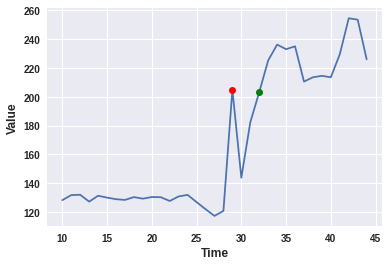

<Figure size 576x396 with 0 Axes>

In [9]:
plt.figure(figsize=(6,4))
lp = sns.lineplot(
            data=power_df.iloc[10:45,],
            x='hour', y='supply',
            palette=sns.color_palette(['lightcoral', 'lightskyblue', 'lightgreen', 'c']),
        )

plt.xlabel('Time', fontsize=12, weight='bold')
plt.ylabel('Value', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')

plt.plot(29,205,'ro')
plt.plot(32,power_df.iloc[32, 1],'go')
fig1 = plt.gcf()
plt.show()
plt.draw()
# fig1.savefig('/home/szamani/Desktop/mcmaster/Thesis/figures/showcases/concetp_anomaly2.png')